In [22]:
import numpy as np
import pandas as pd
import shapefile
import geopandas as gpd
from bokeh.plotting import figure,save,show
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper
import matplotlib.pyplot as plt
from bokeh.io import output_notebook,output_file


In [23]:
output_notebook()

Loading BokehJS ...

In [11]:
# use geo read data
KI=gpd.read_file("Kronos_Island.shp")
# KI=gpd.read_file("Abila.shp")
KI

,Name,geometry
0,Kronos,"POLYGON ((24.8897 36.0729, 24.9519 36.0538, 25..."


In [12]:
KI.plot()


{'type': 'Polygon', 'coordinates': (((24.8897, 36.0729), (24.9519, 36.0538), (25.0045, 36.0251), (25.0858, 35.9916), (25.1431, 35.9629), (25.2149, 35.9342), (25.3439, 35.9151), (25.4252, 35.896), (25.4922, 35.9103), (25.5687, 35.9629), (25.6356, 35.982), (25.7025, 35.9342), (25.8412, 35.9247), (25.9033, 35.9342), (25.9655, 35.982), (26.0324, 36.0107), (26.0324, 35.9725), (25.9894, 35.9247), (25.975, 35.8673), (25.9607, 35.8051), (25.9177, 35.7717), (25.8077, 35.7191), (25.6834, 35.7095), (25.5591, 35.7287), (25.4778, 35.7669), (25.4204, 35.7908), (25.2722, 35.8004), (25.1145, 35.7908), (24.9662, 35.7908), (24.8993, 35.8195), (24.8132, 35.8482), (24.7224, 35.896), (24.6268, 35.9151), (24.5168, 35.9486), (24.4547, 35.9725), (24.3447, 35.9581), (24.2826, 35.9581), (24.1487, 35.9486), (24.0578, 35.9964), (24.0483, 36.0442), (24.0196, 36.0633), (23.9574, 36.0681), (23.9383, 36.0681), (23.8905, 36.0299), (23.8523, 36.0107), (23.8331, 36.0251), (23.8283, 36.092), (23.8044, 36.1207), (23.6849,

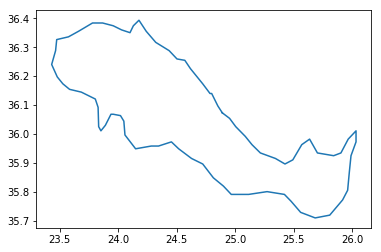

In [30]:
#use shapfile read data
SR=shapefile.Reader("Kronos_Island.shp")
feature = SR.shapeRecords()[0]
first = feature.shape.__geo_interface__  
print (first) # (GeoJSON format)
plt.figure()
for shape in SR.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

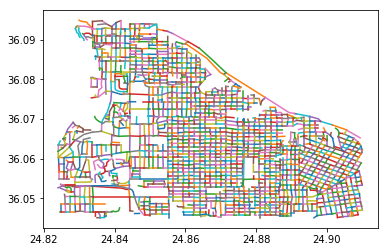

In [27]:
SR=shapefile.Reader("Abila.shp")
plt.figure()
for shape in SR.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [13]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [14]:
KI['x'] = KI.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
KI['y'] = KI.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)
KI.head()

,Name,geometry,x,y
0,Kronos,"POLYGON ((24.8897 36.0729, 24.9519 36.0538, 25...","[24.8897, 24.9519, 25.0045, 25.0858, 25.1431, ...","[36.0729, 36.0538, 36.0251, 35.9916, 35.9629, ..."


In [20]:
source=ColumnDataSource(KI)
source

ColumnDataSource(id='4cbd9832-5163-431f-8b86-d6ab40b59324', ...)

In [15]:
color_mapper = LogColorMapper(palette=palette)
#add  tools
tools="pan,wheel_zoom,reset,save"
p=figure(title="Twitter Geolocalization Interactive Plot",tools=tools,x_axis_location=None, 
y_axis_location=None)
p.grid.grid_line_color = None

In [16]:
p.patches('x', 'y', source=KIsource,
         fill_color={'field': 'Name', 'transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.05)


GlyphRenderer(id='723115a7-0bf4-4623-956b-25011ec1877c', ...)

In [17]:
show(p)

TypeError: Object of type 'Polygon' is not JSON serializable